In [22]:
os.getcwd()

'/Users/francescosurmonte/Desktop/EUI SDFA/eu_sdfa_forecastingTools'

In [23]:
#%%
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

#%%
os.chdir(os.getcwd())
from utils import read_data
from utils import calculate_growth_rates
from utils import get_lagged_variables
from utils import give_sliding_window_volatility
from utils import add_systemic_risk_dummy
from utils import add_missing_variables

In [15]:
target_1 = 'is_systemic_crisis'
target_2 = 'cpi_yoy'

In [16]:
file = './data/data_input_quarterly.csv'
country = 'DE'
df = read_data(file, country)
#%% Transform the data
yoy_variables = ["bankCreditPnfs", "totalCreditPnfsLCY", "totalCreditPnfs2GDP"]
df = calculate_growth_rates(df, yoy_variables)
df = df.drop(yoy_variables, axis=1)
lag2_variables = [f"{col}_yoy" for col in ["bankCreditPnfs", "totalCreditPnfsLCY", "totalCreditPnfs2GDP"]]
df = get_lagged_variables(df, 2, lag2_variables)
df = df.drop(lag2_variables, axis=1)
lag1_variables = [f"{col}_yoy" for col in ["cpi"]]
df = get_lagged_variables(df, 1, lag1_variables)
df = df.drop(lag1_variables, axis=1)
output_file = f'data_quarterly_{country}.csv'
df.to_csv(output_file, index = False)

#%% add summy variable
data = add_systemic_risk_dummy(output_file, 'dummy_final.csv', country)


/Users/francescosurmonte/Desktop/EUI SDFA/eu_sdfa_forecastingTools/utils.py:20: FutureWarning: The 'fill_method' and 'limit' keywords in Series.pct_change are deprecated and will be removed in a future version. Call ffill before calling pct_change instead.
  for growth_rate_variable in growth_rate_variables:
/Users/francescosurmonte/Desktop/EUI SDFA/eu_sdfa_forecastingTools/utils.py:20: FutureWarning: The 'fill_method' and 'limit' keywords in Series.pct_change are deprecated and will be removed in a future version. Call ffill before calling pct_change instead.
  for growth_rate_variable in growth_rate_variables:
/Users/francescosurmonte/Desktop/EUI SDFA/eu_sdfa_forecastingTools/utils.py:20: FutureWarning: The 'fill_method' and 'limit' keywords in Series.pct_change are deprecated and will be removed in a future version. Call ffill before calling pct_change instead.
  for growth_rate_variable in growth_rate_variables:
/Users/francescosurmonte/Desktop/EUI SDFA/eu_sdfa_forecastingTools/uti

In [17]:
data = add_missing_variables(data, country)
data


TypeError: add_missing_variables() takes 1 positional argument but 2 were given

In [18]:

cols2reg = ['policyRate', 'resPropPrice', 'cpi_yoy', 'fx', 'financialStressIndex', 
'bankCreditPnfs_growthRate','totalCreditPnfsLCY_growthRate', 'totalCreditPnfs2GDP_growthRate',
 'fx_std', 'is_systemic_crisis', 'EAtermspread', 'USpolicyRate', 'UStermSpread']


TypeError: Invalid comparison between dtype=int64 and str

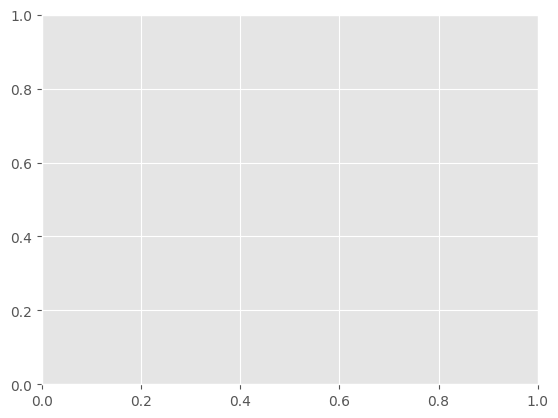

In [19]:
# Create the plot
fig, ax1 = plt.subplots()

# Plot the first time series
ax1.plot(data['financialStressIndex'][data.index > '1970'].rolling(12).mean(), color='b', label='Financial stress index')
ax1.set_xlabel('Date')
ax1.set_ylabel('Financial stress index', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(data['is_systemic_crisis'][data.index > '1970'], color='r', label='Systemic crisis dummy')
ax2.set_ylabel('Systemic crisis dummy', color='r')
ax2.tick_params(axis='y', labelcolor='r')

ax2.grid(False)

# Add a title and legend
plt.title('Target variables')
fig.tight_layout()
fig.legend(loc="lower center", bbox_to_anchor=(0.5,-0.1))

# Show the plot
plt.show()

In [20]:
for col in data.columns:
    plt.plot(data[col][data.index>'1970'])
    plt.title(col)
    plt.show()

TypeError: Invalid comparison between dtype=int64 and str

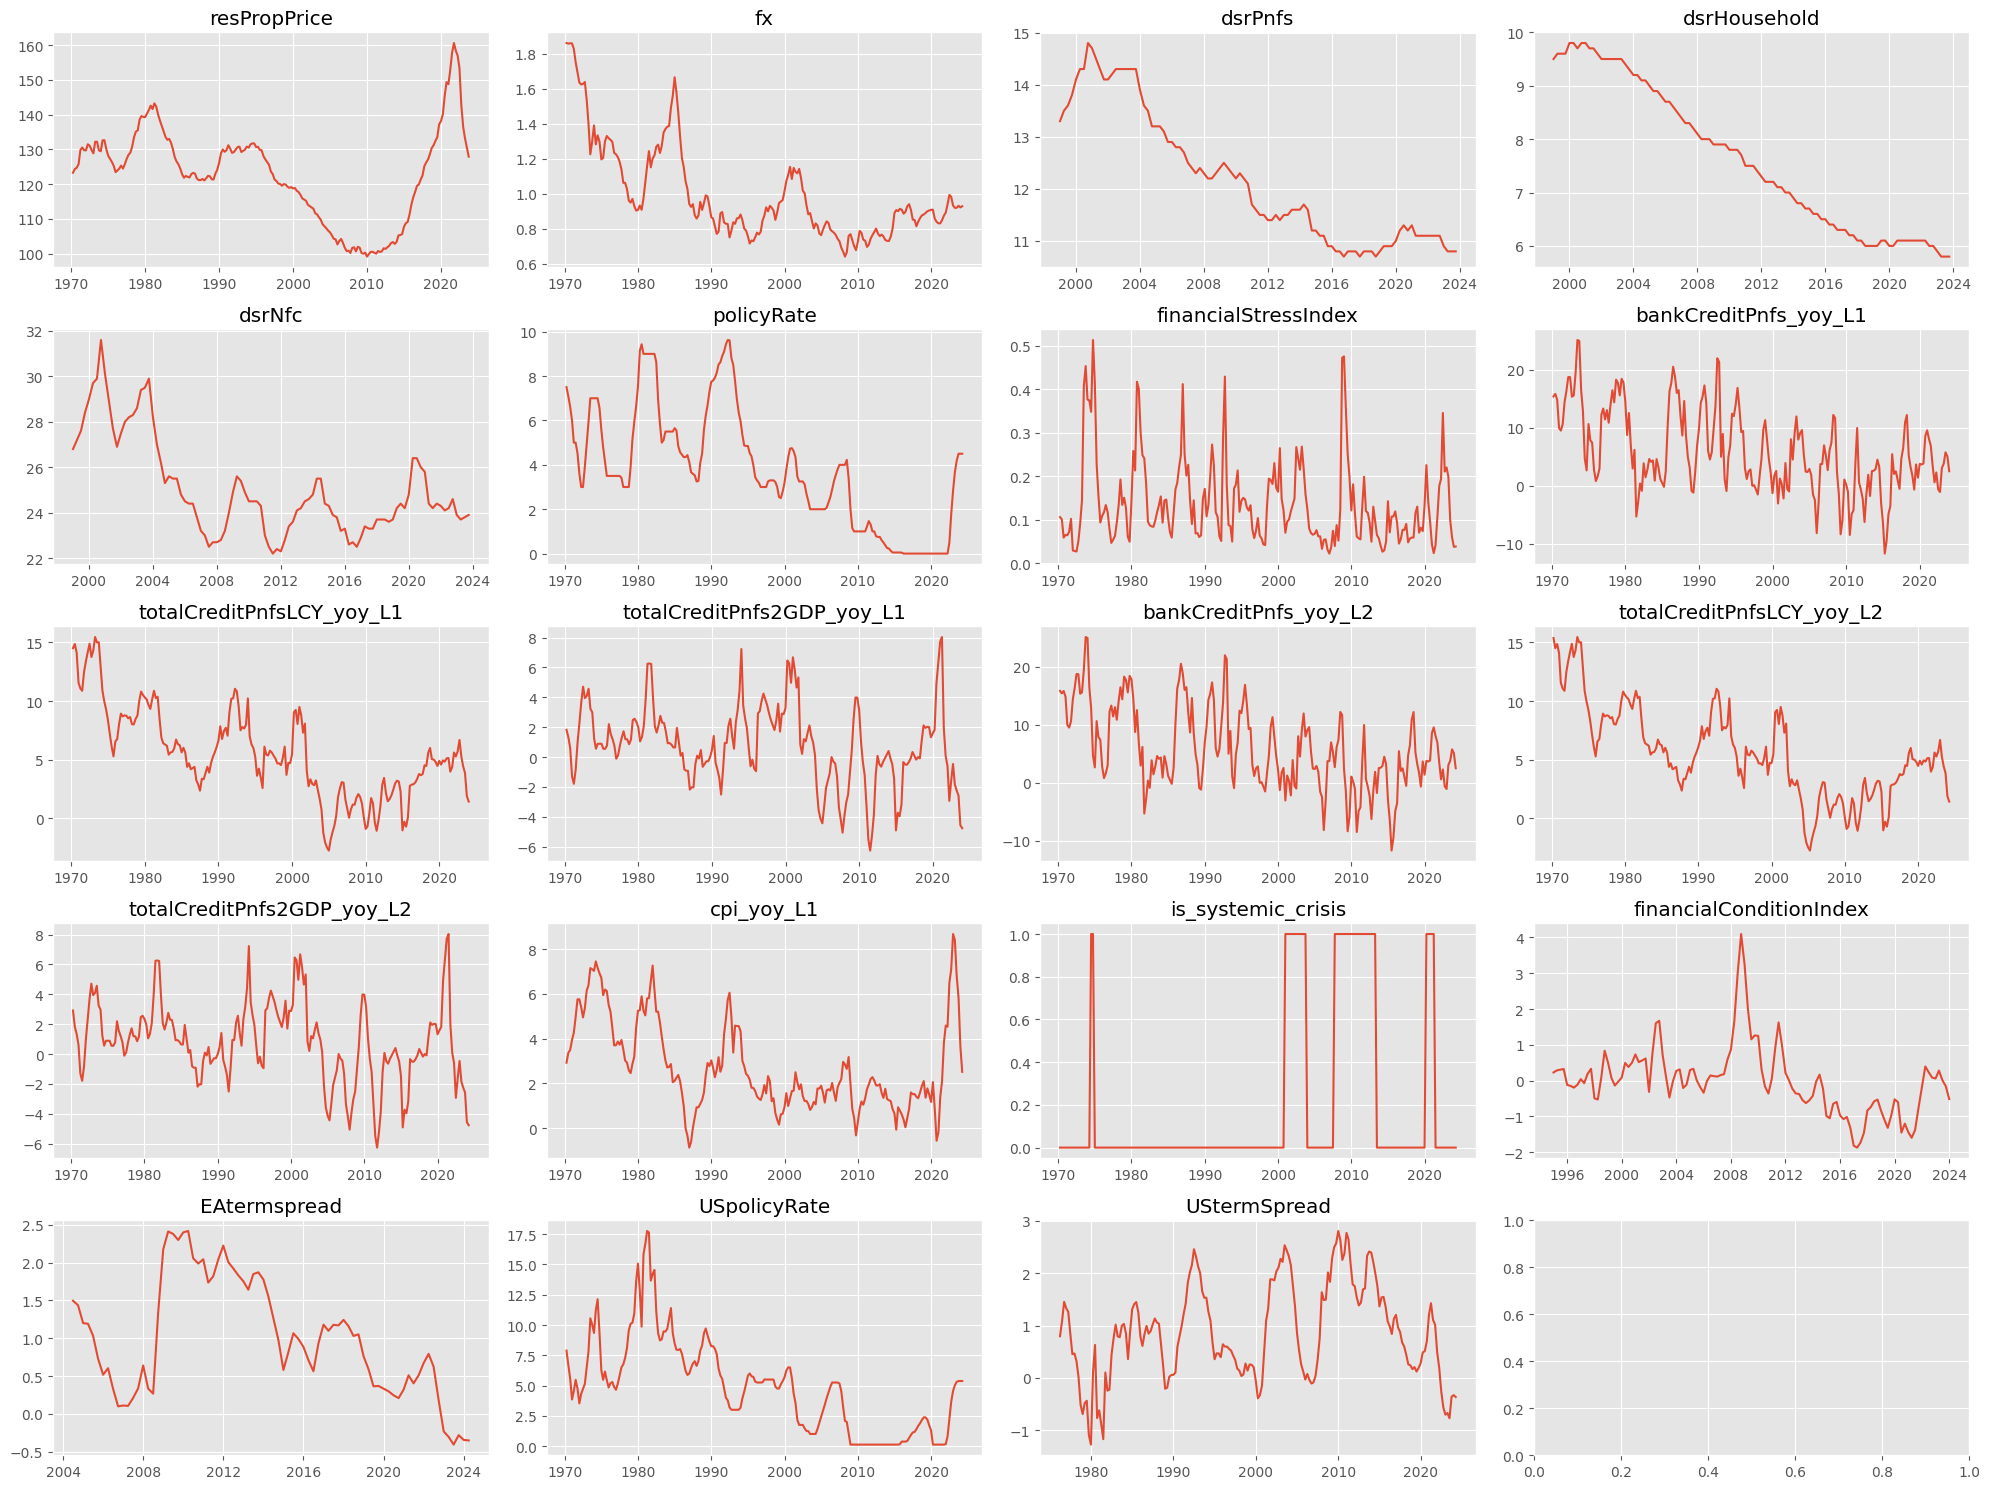

In [27]:
fig, axes = plt.subplots(5, 4, figsize=(20, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and plot it on the respective subplot
for i, col in enumerate(data.columns):
    axes[i].plot(data[col][data.index > '1970'])
    axes[i].set_title(col)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [25]:
len(data.columns)

19